# Run GP

*Last updated Monday, 06 Sep 2021.*

=====================================================================================================
1. **Load data**

2. **Find GP**

3. **Results**
    1. Kernel overview
    2. Find minimum of GP mean
    3. Plot GP

=====================================================================================================

## 1. Load data
Load data from R code. Column 0, 1 are mass donor and orbital period, respectively. Colmn 15 has error.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

(Choose if caso conservativo:)

In [4]:
typ = "fixed"
#typ = "free"

In [10]:
if typ == "fixed":
    errorSimulations = genfromtxt('Output_errorFromR/File20210917_R04_EBVfixed_sim1to3_errors3.csv', delimiter=',',
                              names = True)
    errorSimulations["teffError3"][np.isnan(errorSimulations["teffError3"])] = float("inf")
    errorSimulations["cnError3"][np.isnan(errorSimulations["cnError3"])] = float("inf")
    errorSimulations["massError3"][np.isnan(errorSimulations["massError3"])] = float("inf")
    errorSimulations["mdotError3"][np.isnan(errorSimulations["mdotError3"])] = float("inf")
else:
    errorSimulations = genfromtxt('Output_errorFromR/File20210917_R04_EBVfree_sim1_errors3.csv', delimiter=',',
                              names = True)
    errorSimulations[np.isnan(errorSimulations[:,15]),15] = 10

X_init = errorSimulations[:,[0,1]]
Y_init = errorSimulations[:,[15]]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [91]:
errorSimulations = genfromtxt('Output_errorFromR/File20210917_R04_EBVfixed_sim1to3_errors3.csv', delimiter=',',
                              names = True)
#errorSimulations[~np.isnan(errorSimulations["mass"])]
#np.isnan(errorSimulations["mass"]).shape
#np.isnan(errorSimulations[:,2]).shape
errorSimulations["mass"]

array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.1  , 1.1  , 1.1  , 1.1  , 1.1  , 1.1  , 1.1  ,
       1.1  , 1.1  , 1.1  , 1.2  , 1.2  , 1.2  , 1.2  , 1.2  , 1.2  ,
       1.2  , 1.2  , 1.2  , 1.2  , 1.3  , 1.3  , 1.3  , 1.3  , 1.3  ,
       1.3  , 1.3  , 1.3  , 1.3  , 1.3  , 1.3  , 1.4  , 1.4  , 1.4  ,
       1.4  , 1.4  , 1.4  , 1.4  , 1.4  , 1.4  , 1.4  , 1.4  , 1.5  ,
       1.5  , 1.5  , 1.5  , 1.5  , 1.5  , 1.5  , 1.5  , 1.5  , 1.5  ,
       1.5  , 1.6  , 1.6  , 1.6  , 1.6  , 1.6  , 1.6  , 1.6  , 1.6  ,
       1.6  , 1.6  , 1.6  , 1.7  , 1.7  , 1.7  , 1.7  , 1.7  , 1.7  ,
       1.7  , 1.7  , 1.7  , 1.7  , 1.7  , 1.8  , 1.8  , 1.8  , 1.8  ,
       1.8  , 1.8  , 1.8  , 1.8  , 1.8  , 1.8  , 1.8  , 1.9  , 1.9  ,
       1.9  , 1.9  , 1.9  , 1.9  , 1.9  , 1.9  , 1.9  , 1.9  , 1.9  ,
       2.   , 2.   , 2.   , 2.   , 2.   , 2.   , 2.   , 2.   , 2.   ,
       2.   , 2.   , 0.9  , 0.9  , 0.9  , 0.9  , 0.9  , 0.9  , 0.9  ,
       0.9  , 0.9  ,

In [85]:
errorSimulations = genfromtxt('Output_errorFromR/File20210917_R04_EBVfixed_sim1to3_errors3.csv', delimiter=',',
                              skip_header = 1)
errorSimulations[:,[0,1]]

array([[1.   , 2.4  ],
       [1.   , 2.5  ],
       [1.   , 2.6  ],
       [1.   , 2.7  ],
       [1.   , 2.8  ],
       [1.   , 2.9  ],
       [1.   , 3.   ],
       [1.   , 3.1  ],
       [1.   , 3.2  ],
       [1.   , 3.3  ],
       [1.   , 3.4  ],
       [1.1  , 2.4  ],
       [1.1  , 2.5  ],
       [1.1  , 2.6  ],
       [1.1  , 2.7  ],
       [1.1  , 2.8  ],
       [1.1  , 2.9  ],
       [1.1  , 3.   ],
       [1.1  , 3.1  ],
       [1.1  , 3.2  ],
       [1.1  , 3.3  ],
       [1.2  , 2.4  ],
       [1.2  , 2.5  ],
       [1.2  , 2.6  ],
       [1.2  , 2.7  ],
       [1.2  , 2.8  ],
       [1.2  , 2.9  ],
       [1.2  , 3.   ],
       [1.2  , 3.1  ],
       [1.2  , 3.2  ],
       [1.2  , 3.3  ],
       [1.3  , 2.4  ],
       [1.3  , 2.5  ],
       [1.3  , 2.6  ],
       [1.3  , 2.7  ],
       [1.3  , 2.8  ],
       [1.3  , 2.9  ],
       [1.3  , 3.   ],
       [1.3  , 3.1  ],
       [1.3  , 3.2  ],
       [1.3  , 3.3  ],
       [1.3  , 3.4  ],
       [1.4  , 2.4  ],
       [1.4

## 2. Gaussian process model
Run GPflow to fit current data to a Gaussian process

In [8]:
import gpflow
import tensorflow as tf
from gpflow.utilities import print_summary

In [9]:
k = gpflow.kernels.Matern32(lengthscales = [0.25, 0.25]) # [0.01, 0.01]
m = gpflow.models.GPR(data=(X_init, np.log(Y_init)), kernel=k, mean_function=None)
opt = gpflow.optimizers.Scipy()

opt_logs = opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=100))
print_summary(m)

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════════════════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │ value                   │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════════════════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 2.575387727650941       │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────────────────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ (2,)    │ float64 │ [0.25381604 0.3841029 ] │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────────────────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ floa

## 3. Results

### *Kernel overview (optional)
Plot kernel (as in https://gpflow.readthedocs.io/en/master/notebooks/advanced/kernels.html):

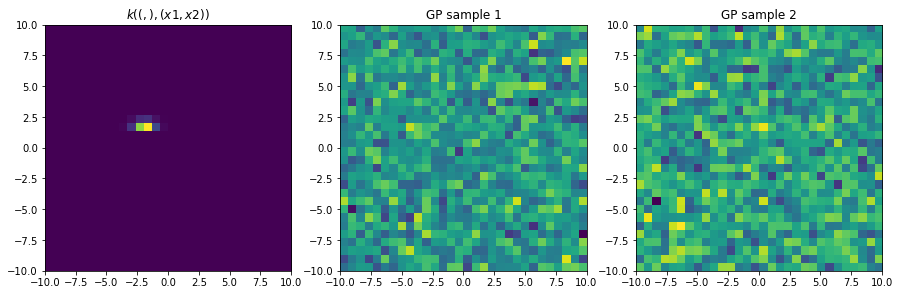

In [41]:
n_grid = 30
x = np.linspace(-10, 10, n_grid)
X, Y = np.meshgrid(x, x)
X = np.vstack((X.flatten(), Y.flatten())).T

# plot the kernel
x0 = np.array([[-2.0, -2.0]])
KxX = k(X, x0).numpy().reshape(n_grid, n_grid)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(KxX, extent=[-10, 10, -10, 10])
axes[0].set_title(f"$k(( , ), (x1, x2))$")

# plot a GP sample
K = k(X).numpy()
Z = np.random.multivariate_normal(np.zeros(n_grid ** 2), K, 2)
axes[1].imshow(Z[0, :].reshape(n_grid, n_grid), extent=[-10, 10, -10, 10])
axes[1].set_title("GP sample 1")
axes[2].imshow(Z[1, :].reshape(n_grid, n_grid), extent=[-10, 10, -10, 10])
_ = axes[2].set_title("GP sample 2")

### Find minimum of GP
Find minimum of mean of GP posterior, using a spicy optimiser

In [44]:
from scipy.optimize import minimize

def minFn(x):
    mean, var = m.predict_f(np.array([x]))
    return mean.numpy()[0][0]

# Run minimiser
x0 = np.array([0.98, 3.12])
res = minimize(minFn, x0, method='nelder-mead')

# Save in minGP
minGP = res.x

# (Fixed) Minimum is: array([0.98000933, 3.11893855])
# (Free) Minimum is:
minGP

array([0.97649597, 2.82856846])

### Plot GP
Plot mean GP, current points, minimum

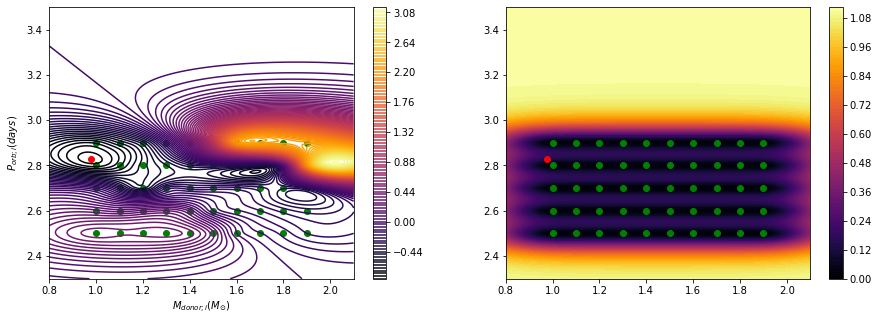

In [43]:
import matplotlib.pyplot as plt

## generate test points for prediction/interpolation
n_grid = 200
x = np.linspace(0.8, 2.1, n_grid)
y = np.linspace(2.3, 3.5, n_grid)
Xg, Yg = np.meshgrid(x, y)
X = np.vstack((Xg.flatten(), Yg.flatten())).T

## predict mean and variance of latent GP at test points
mean, var = m.predict_f(X)
meanX = mean.numpy().reshape(n_grid, n_grid)
varX = var.numpy().reshape(n_grid, n_grid)

## plot GP
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.contour(x, y, meanX, 100, cmap = "inferno")
plt.colorbar()
plt.scatter(X_init[:,0], X_init[:,1], label=u'Observations', c = "green")
#plt.scatter(x[np.where(meanX == np.amin(meanX))[1]],
#            y[np.where(meanX == np.amin(meanX))[0]], label=u'Observations', c = "red")
plt.scatter(minGP[0], minGP[1], label=u'Observations', c = "red")
plt.xlabel("$M_{donor;i}(M_{\odot})$")
plt.ylabel("$P_{orb;i}(days)$")

# plot variance of GP
plt.subplot(1, 2, 2)
plt.contourf(x, y, varX, 100, cmap = "inferno")
plt.colorbar()
plt.scatter(X_init[:,0], X_init[:,1], label=u'Observations', c = "green")
plt.scatter(minGP[0], minGP[1], label=u'Observations', c = "red")

# TODO: reshape does something weird with the dimensions?
